In [ ]:
import pandas as pd
import lightgbm as lgb

from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRyEOCFg3lv84x0rgwealMd1lLu9EmznbrZQZIpLfvvFRZv8CcCbbGs9Tff0L5HjaLXtoXlMTQ1rUkp/pub?output=csv'


df = pd.read_csv(url)


In [ ]:
df.head()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,31490000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,39,28,1,6,4,4,80979
1,556610000,1.0,9,9.0,9.0,3,3.0,9.0,10.0,4.0,1.5,30,23,0,8,8,8,93691
2,13590000,1.0,3,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,18,18,0,6,7,9,94361
3,27190000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,15,12,1,11,4,6,77753
4,25900000,1.0,5,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,46,38,0,6,8,10,94361


In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los datos del DataFrame
df_scaled = scaler.fit_transform(df)

# Crear un DataFrame a partir del array resultante y especificar los nombres de las columnas
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled.head(3)

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,0.041674,0.166667,0.000000,0.899497,0.875,1.0,1.0,1.0,0.296482,0.431818,0.0,0.080851,0.088816,1.0,0.454545,0.2,0.250,0.858150
1,0.736617,0.166667,0.041451,0.899497,0.875,1.0,1.0,1.0,1.000000,0.431818,1.0,0.061702,0.072368,0.0,0.636364,1.0,0.750,0.992898
2,0.017985,0.166667,0.010363,0.899497,0.875,1.0,1.0,1.0,0.296482,0.431818,1.0,0.036170,0.055921,0.0,0.454545,0.8,0.875,1.000000


In [ ]:
# Separar la columna objetivo (y) del resto de las características (X)
X = df_scaled.iloc[:, 1:] # Todas las filas, todas las columnas excepto la primera
y = df_scaled.iloc[:, 0]   # Todas las filas, solo la primera columna

In [ ]:

# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# hiperparámetros
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'num_leaves': 10,
    'learning_rate': 0.034394681668452436,
    'max_depth': 3,
    'min_child_samples': 17,
    'subsample': 0.939758109968153,
    'colsample_bytree': 0.8484057097692045,
    'reg_alpha': 0.07960201361433986,
    'reg_lambda': 0.022974335270273885
}

# Crear el modelo LightGBM con los hiperparámetros proporcionados
model = lgb.LGBMRegressor(**params)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
preds = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calcular R^2
r2 = r2_score(y_test, preds)

# Calcular MSE
mse = mean_squared_error(y_test, preds)

print("R^2:", r2)
print("MSE:", mse)


R^2: 0.4867274521147754
MSE: 0.011679478963275806


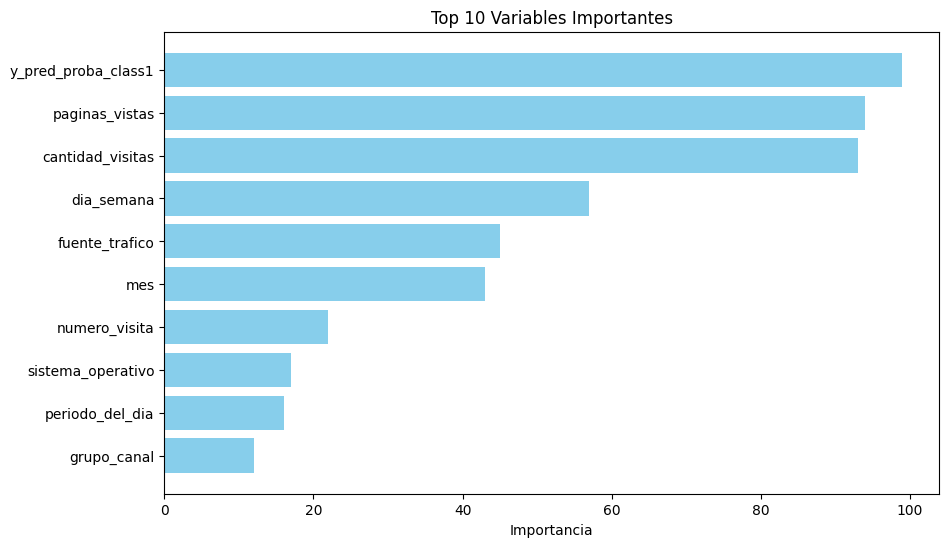

In [ ]:
import matplotlib.pyplot as plt

# Importancia de las características
feature_importance = model.feature_importances_

# Nombres de las características
feature_names = X_train.columns

# Diccionario con nombres de características e importancia
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# TOP 10 características más importantes
top_10_features = list(sorted_feature_importance.keys())[:10]
top_10_importance = list(sorted_feature_importance.values())[:10]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importance, color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 10 Variables Importantes')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más importante en la parte superior
plt.show()